<a href="https://colab.research.google.com/github/hamzafarooqui98/CE-888/blob/main/Lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

* We have loaded the necessary libraries above
* Now let's load the data

In [2]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
# and save the label in a column called 'y' in df.
df['y'] = data.target ## YOUR CODE HERE label
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
#How many samples and features are there?
x = list(df.count())
y = len(df.columns)
#list(data.target_names)
# YOUR CODE HERE
print('number of samples:', x, 'number of features:', y)

number of samples: [178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178] number of features: 14


In [4]:
# Quiz Q1
# How many instances are there for each class? 
print("The instances in class_0 are: ",len(df.query('y==0')))
print("The instances in class_1 are: ",len(df.query('y==1')))
print("The instances in class_1 are: ",len(df.query('y==2')))
# YOUR CODE HERE


The instances in class_0 are:  59
The instances in class_1 are:  71
The instances in class_1 are:  48


In [5]:
# Calculate the means, medians, and standard deviations of each feature
b = np.median(df)
a = np.mean(df)
c = np.std(df)
print('Mean is : ',a ,'Median is : ', b, 'Std is : ', c)
# YOUR CODE HERE

Mean is :  alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
y                                 0.938202
dtype: float64 Median is :  2.5 Std is :  alcohol                           0.809543
malic_acid                        1.114004
ash                               0.273572
alcalinity_of_ash                 3.330170
magnesium                        14.242308
total_phenols                     0.624091
flavanoids                        0.996049
nonflavanoid_phenols              0.124103
p

In [6]:
data = pd.DataFrame(df)
data.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


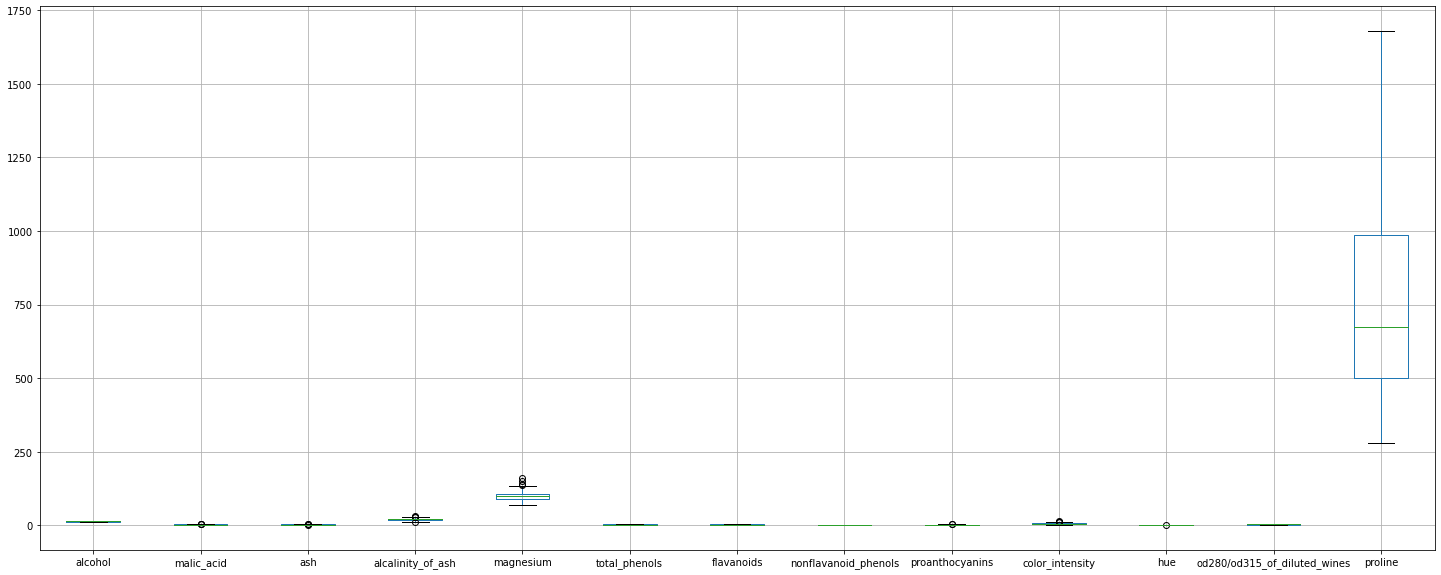

In [7]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?
df_new = df.drop(['y'],axis=1)
df_new.boxplot(figsize=(25,10))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59da0f4f90>,
      dtype=object)

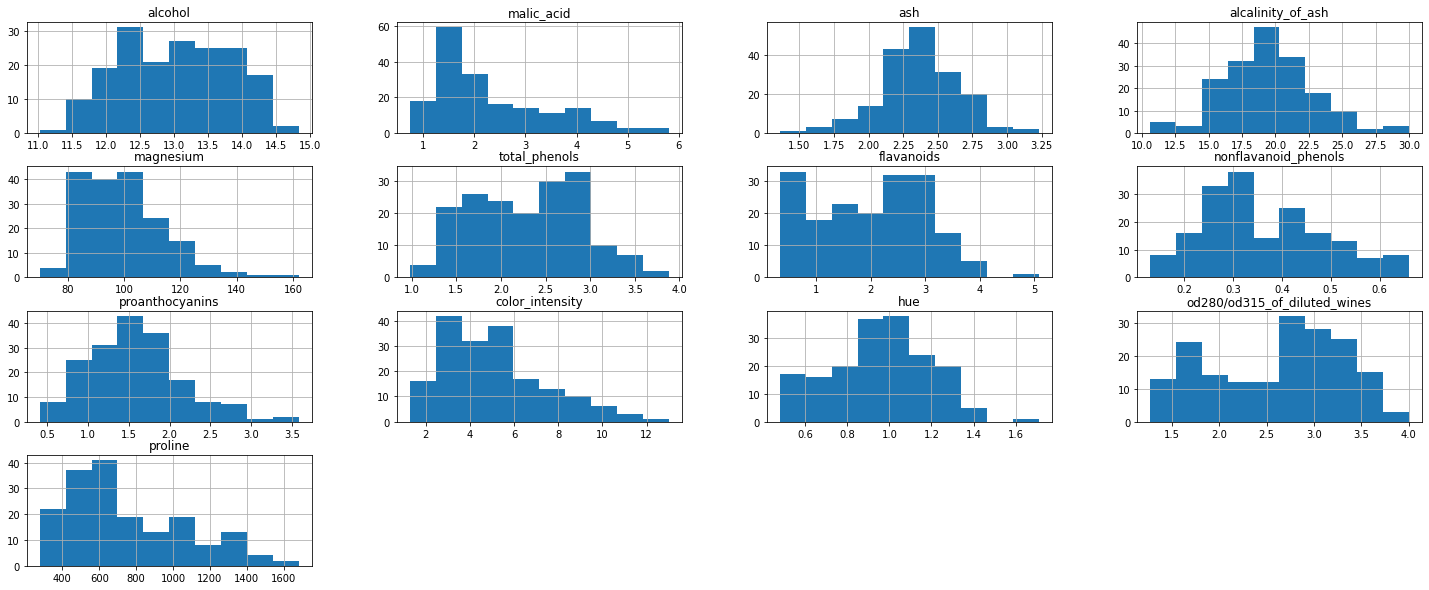

In [8]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features
df_new.hist(figsize=(25,10))
# YOUR CODE HERE

Let's do some multivariate analysis

In [9]:
# Calculate the correlations between each pair of variables
df_new.corr()
# YOUR CODE HERE


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


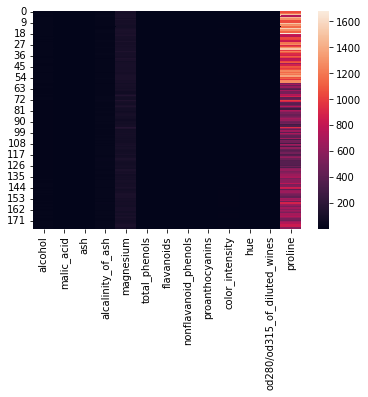

In [10]:

# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)
sns.heatmap(df_new,annot=False)
# YOUR CODE HERE

In [11]:
# What is the highest correlation between features?
df_new.corr().unstack().sort_values(ascending= False).drop_duplicates()

alcohol                       alcohol                 1.000000
total_phenols                 flavanoids              0.864564
od280/od315_of_diluted_wines  flavanoids              0.787194
                              total_phenols           0.699949
proanthocyanins               flavanoids              0.652692
                                                        ...   
nonflavanoid_phenols          total_phenols          -0.449935
od280/od315_of_diluted_wines  nonflavanoid_phenols   -0.503270
hue                           color_intensity        -0.521813
nonflavanoid_phenols          flavanoids             -0.537900
hue                           malic_acid             -0.561296
Length: 79, dtype: float64

You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

In [12]:
# question number 4 - Newly added cell
# def correlation(col1,col2 ):
#     return np.corrcoef(col1,col2)
# print('%.3f' % correlation(df['alcohol'], df['hue']
def correlation(df, column1, column2):
    return df_new.corr().loc[column1, column2]
correlation(df_new,'alcohol','hue')

-0.0717471973301557

In [13]:
#Question number 3 - Newly added cell
def column_average(df, column):
    return df[column].mean()

column_average(df_new,'alcohol')


13.000617977528083

In [14]:
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
standard = StandardScaler()
scaled = standard.fit_transform(df_new)
scaled

X_p = pca.fit_transform(scaled)
X_p
# YOUR CODE HERE


array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

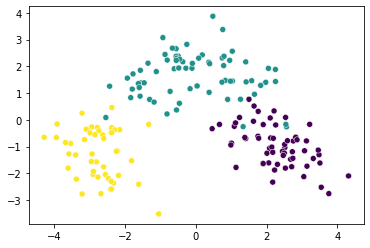

In [15]:

## Plot your two components, using the label from the data to colour the points

sns.scatterplot(x= X_p[:, 0],y = X_p[:, 1],c = df['y'])  # this is just for plotting purposes
# YOUR CODE HERE


In [16]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)

# We can see the explained variance (w.r.t. original dataset) ratio of each component:

# YOUR CODE HERE


pca = PCA(0.85).fit(scaled)
pca.n_components_


6

In [17]:
# How much variance is retained if we do PCA with 3 components? (Q7)

pca = PCA(n_components=3).fit(scaled)
np.sum(pca.explained_variance_ratio_) * 100

# YOUR CODE HERE


66.52996889318523

## Clustering

Let's see how many clusters does K-Means find.



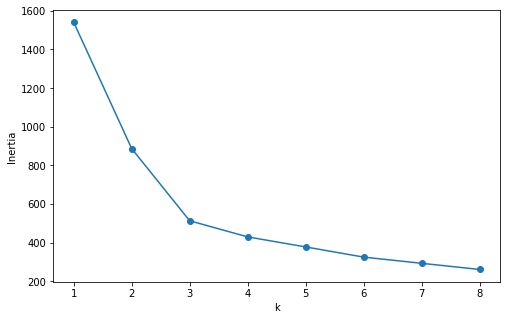

In [18]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.
pca = PCA(n_components=3)
score_pca = pca.fit_transform(scaled)
inertia =[]
for k in range(1,9):
    kmeans_pca = KMeans(n_clusters=k)
    kmeans_pca.fit(score_pca)
    inertia.append(kmeans_pca.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(1, 9), inertia, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()
# YOUR CODE HERE


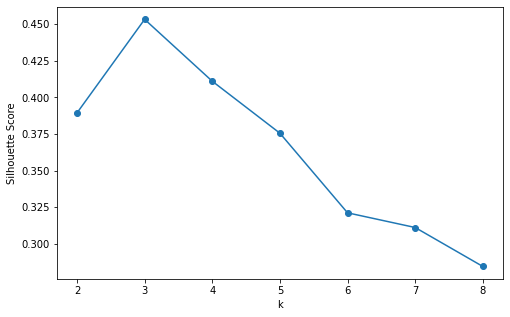

In [19]:
pca = PCA(n_components=3)
score_pca = pca.fit_transform(scaled)
sil = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(score_pca)
    sil.append(silhouette_score(score_pca, y_pred))
# Let's plot SIL vs number of clusters
plt.figure(figsize=(8,5))
plt.plot(range(2, 9), sil, 'o-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()


In [20]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell
from sklearn.metrics import silhouette_score
print(silhouette_score(score_pca, y_pred))
# print('SIL:', met)


0.28464147698261777


2


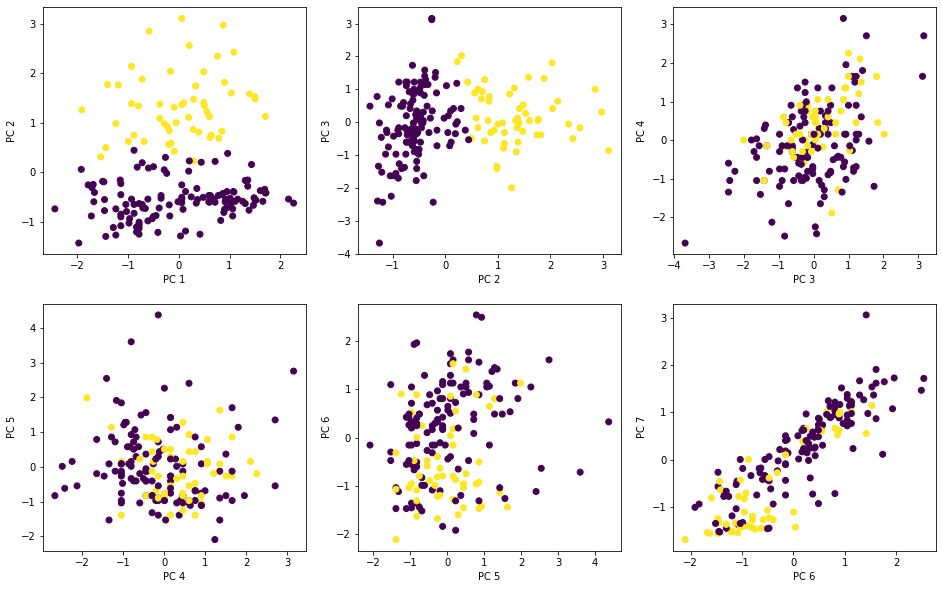

In [21]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k
clusterer = KMeans(n_clusters=2)
clusterer.fit(scaled[:, 1:3])
print(len(set(clusterer.labels_)))  # how many clusters did it find?
# And plot them
plt.figure(figsize=(16,10))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.scatter(scaled[:, i-1], scaled[:, i], c=clusterer.labels_)
    plt.xlabel('PC %d' % i)
    plt.ylabel('PC %d' % (i+1))
plt.savefig('students_pca_clusters_kmeans=2.pdf', dpi=300)
plt.show()
# YOUR CODE HERE


Now we can try to understand our clusters.

In [22]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above
df
# YOUR CODE HERE


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [23]:
# Do a boxplot of each feature, separating between clusters

# YOUR CODE HERE


Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?

In [24]:
# Feel free to keep playing with the data here!